<h1 style="text-align: center; color: green">Nhập thư viện</h1>

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="text-align: center; color: green">Các hàm cần dùng</h1>

In [2]:
def mse(x, y):
    summation = 0
    n = len(y)
    for i in range(0, n):
        difference = y[i] - x[i]
        squared_difference = difference ** 2
        summation = summation + squared_difference
    return summation / n


def correlation(x, y):
    mean_x = sum(x) / float(len(x))
    mean_y = sum(y) / float(len(y))

    sub_x = [i - mean_x for i in x]

    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i] * sub_y[i] for i in range(len(sub_x))])

    std_deviation_x = sum([sub_x[i] ** 2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i] ** 2.0 for i in range(len(sub_y))])

    denominator = (std_deviation_x * std_deviation_y) ** 0.5
    cor = numerator / denominator
    return cor


def loadData(path):
    data = pd.read_csv(path)
    train_size = int(len(data) * 0.8)
    train_df = data[:train_size:]
    test_df = data[train_size:]
    return train_df, test_df, data.keys()

def calcDistancs(pointA, pointB, numOfFeature):
    tmp = 0
    for i in range(numOfFeature):
        tmp += (float(pointA[i]) - float(pointB[i])) ** 2
    return math.sqrt(tmp)


def kNearestNeighbor(train_data, point, k):
    distances = []
    for row in train_data.values:
        distances.append({"label": row[-1], "value": calcDistancs(row, point, len(train_data.columns))})
    distances.sort(key=lambda x: x["value"])
    labels = [value["label"] for value in distances]
    return labels[:k]


def findMostOccur(arr):
    labels = set(arr)
    ans = ""
    maxOccur = 0
    for label in labels:
        num = arr.count(label)
        if num > maxOccur:
            maxOccur = num
            ans = label
    return ans

<h1 style="text-align: center; color: green">Chia dữ liệu huấn luyện, dự đoán</h1>

In [3]:
trainSet, testSet, header = loadData("dataset.csv")
x_train = trainSet.drop(labels='target', axis=1)
y_train = trainSet['target']
x_test = testSet.drop(labels='target', axis=1)
y_test = testSet['target']

<h1 style="text-align: center; color: green">Vẽ biểu đồ tương quan</h1>

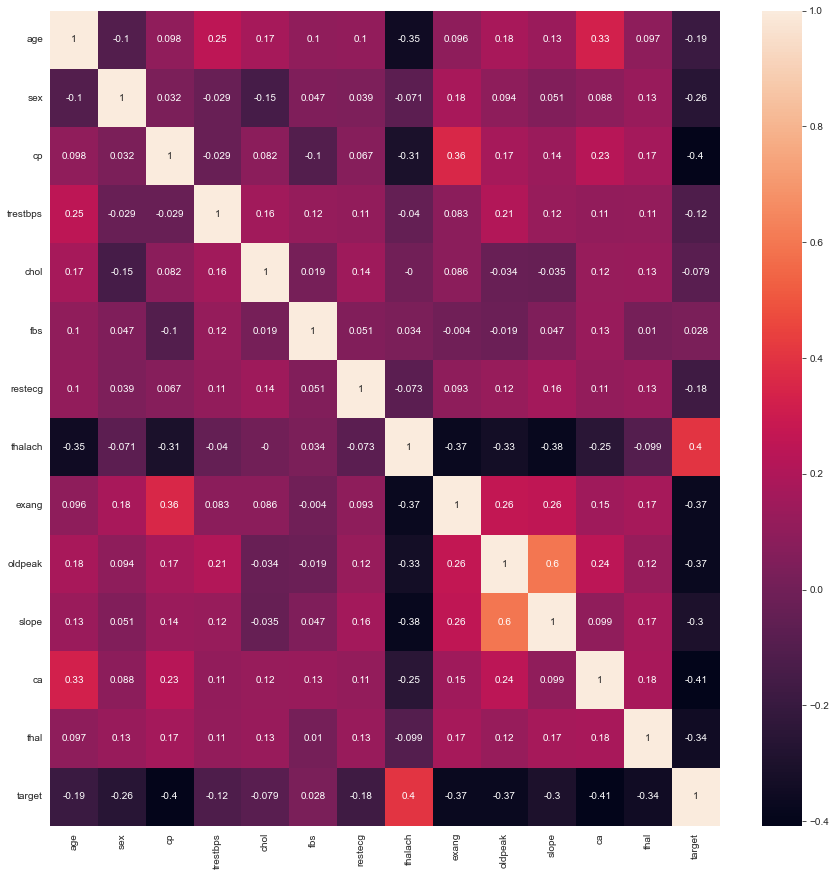

In [4]:
corr = []
corr_matrix = []

for i in header:
    tmp = []
    for j in header:
        tmp.append(round(correlation(trainSet[i], trainSet[j]), 3))
    corr.append(tmp)

corr = pd.DataFrame(data=corr, index=header, columns=header)

sns.heatmap(corr, annot=True)
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.show()

<h1 style="text-align: center; color: green">Dự đoán từ mô hình huấn luyện</h1>

In [5]:
numOfRightAnswer = 0
for item in testSet.values:
    knn = kNearestNeighbor(trainSet, item, 5)
    answer = findMostOccur(knn)
    numOfRightAnswer += item[-1] == answer
    print("Thực tế: {} -> Dự đoán: {}".format(item[-1], answer))
print("Độ chính xác", numOfRightAnswer / len(testSet))
print(numOfRightAnswer)


Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 0.0 -> Dự đoán: 0.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 0.0 -> Dự đoán: 0.0
Thực tế: 0.0 -> Dự đoán: 0.0
Thực tế: 0.0 -> Dự đoán: 1.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 0.0 -> Dự đoán: 0.0
Thực tế: 0.0 -> Dự đoán: 1.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 0.0 -> Dự đoán: 1.0
Thực tế: 0.0 -> Dự đoán: 1.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 1.0 -> Dự đoán: 0.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 0.0 -> Dự đoán: 0.0
Thực tế: 0.0 -> Dự đoán: 1.0
Thực tế: 0.0 -> Dự đoán: 0.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 0.0 -> Dự đoán: 0.0
Thực tế: 1.0 -> Dự đoán: 0.0
Thực tế: 0.0 -> Dự đoán: 0.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 0.0 -> Dự đoán: 0.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 1.0 -> Dự đoán: 1.0
Thực tế: 0.0 -